# Spatial Analysis II

## Multiple Layer Analysis

### Select Data based on Location

Until now we have seen selections based on numerical and string values (&,|) in pandas dataframe. Now what if we want to select all the hospitals with in Cuyahoga county, or all the covid cases with in the City of Cleveland, or find out all the highways that pass through Cuyahoga County or all the land parcels that are with in 5 mile radius of a nuclear reactor. For all these queries we use selection by location. So let's see some operations and the corresponding examples

#### Within and Contains

As the name suggests within and contains operations are used to select geometries that are completely inside a given geometry (used for selection) or geometries that contain the given geometry. 

![point_circle](images/point_circle.png)

So let us select all the hospitals from Cuyahoga county

In [139]:
import pandas as pd
import geopandas as gpd

In [140]:
hospitals = gpd.read_file('../../largedatasets/Ohio_hospitals/Ohio_hospitals.shp')
hospitals.head()

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,235,14244266,ROBINSON MEMORIAL HOSPITAL,6847 N CHESTNUT,RAVENNA,OH,(330) 297-2300,GENERAL ACUTE CARE,OPEN,302,...,http://www.uhhospitals.org/portage,1255,UNIVERSITY HOSPITALS PORTAGE MEDICAL CENTER,39,NON-PROFIT,-999,302,LEVEL III,Y,POINT (-81.24902 41.17606)
1,246,17545409,MIAMI VALLEY HOSPITAL,ONE WYOMING STREET,DAYTON,OH,(937) 208-8000,GENERAL ACUTE CARE,OPEN,883,...,http://www.miamivalleyhospital.org,1247,NOT AVAILABLE,39,NON-PROFIT,-999,883,LEVEL I,Y,POINT (-84.18591 39.74489)
2,259,14044481,ST JOSEPH HEALTH CENTER,667 EASTLAND AVE SE,WARREN,OH,(330) 841-4000,GENERAL ACUTE CARE,OPEN,219,...,http://www.hmpartners.org,1000,NOT AVAILABLE,39,NON-PROFIT,-999,219,LEVEL III,Y,POINT (-80.77716 41.23091)
3,260,2944482,TRUMBULL MEMORIAL HOSPITAL,1350 EAST MARKET STREET,WARREN,OH,(330) 841-9011,GENERAL ACUTE CARE,OPEN,346,...,http://www.valleycarehealth.net,1283,NOT AVAILABLE,39,PROPRIETARY,-999,346,LEVEL III,Y,POINT (-80.79878 41.23586)
4,268,9344221,EDWIN SHAW REHABILITATION INSTITUTE,330 BROADWAY EAST,CUYAHOGA FALLS,OH,(330) 436-0910,REHABILITATION,CLOSED,139,...,http://www.edwinshaw.com,1320,NOT AVAILABLE,39,NON-PROFIT,-999,139,NOT AVAILABLE,N,POINT (-81.47738 41.13215)


In [141]:
countyBoundaries = gpd.read_file('../../largedatasets/ohio_county_boundaries/ODOT_County_Boundaries.shp')
countyBoundaries.head()

,OBJECTID,COUNTY_CD,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,LONG_WEST_,AREA_SQMI,AREA_ID,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
0,1,HIG,HILLSBORO,9,39071,43589,40875,35728,S,1340,...,-83.873,557.74,53,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.407747e+09,213157.740992,"POLYGON ((-83.78330 39.26382, -83.78312 39.263..."
1,2,HOC,LOGAN,10,39073,29380,28241,25533,S,1220,...,-82.748,423.50,54,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.844277e+09,215451.632241,"POLYGON ((-82.49595 39.60265, -82.49505 39.612..."
2,3,HOL,MILLERSBURG,11,39075,42366,38943,32849,N,1380,...,-82.222,424.03,55,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.905310e+09,193045.013152,"POLYGON ((-81.87727 40.66713, -81.87564 40.667..."
3,4,HUR,NORWALK,3,39077,59626,59487,56240,N,1200,...,-82.843,495.96,56,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.267372e+09,197349.121399,"POLYGON ((-82.83547 41.14407, -82.83549 41.145..."
4,5,FRA,COLUMBUS,6,39049,1163414,1068978,961437,S,1130,...,-83.255,543.97,143,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.401407e+09,211754.151636,"POLYGON ((-83.24596 39.96574, -83.24595 39.965..."


**Before applying the method make sure that both the geodataframes have the same projections (or else re-project)**

In [142]:
countyBoundaries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [143]:
hospitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Both the datasets are having the same projection. So lets go ahead and apply the within method. 

We want to select all the hospitals that are with in Cuyahoga county. So let's create a variable and store Cuyahoga County.

In [144]:
cuyCounty = countyBoundaries[countyBoundaries.COUNTY_CD=='CUY']
cuyCounty

,OBJECTID,COUNTY_CD,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,LONG_WEST_,AREA_SQMI,AREA_ID,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
73,74,CUY,CLEVELAND,12,39035,1280122,1393978,1412140,N,1280,...,-81.972,459.01,34,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.116231e+09,244073.200371,"POLYGON ((-81.39143 41.44521, -81.39076 41.445..."


In [145]:
hospitalsCuy = hospitals[hospitals.within(cuyCounty.geometry.values[0])]

We have used cuyCounty.geometry.values[0] here as we are interested in checking with only one geometry. 

If you check cuyCounty.geometry you will see that it is geoseries and if you further select the attribute values you will get the array of geometries (list of geometries) inside it.

In [146]:
cuyCounty.geometry

73    POLYGON ((-81.39143 41.44521, -81.39076 41.445...
Name: geometry, dtype: geometry

In [147]:
cuyCounty.geometry.values  #this is an array of geometries and you can select elements based on index

<GeometryArray>
Length: 1, dtype: geometry

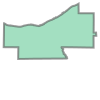

In [148]:
cuyCounty.geometry.values[0]

Ok now let's get the county that contains *ROBINSON MEMORIAL HOSPITAL* with OBJECTID 235 

In [149]:
robinson = hospitals[hospitals.OBJECTID==235]
robinson

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,235,14244266,ROBINSON MEMORIAL HOSPITAL,6847 N CHESTNUT,RAVENNA,OH,(330) 297-2300,GENERAL ACUTE CARE,OPEN,302,...,http://www.uhhospitals.org/portage,1255,UNIVERSITY HOSPITALS PORTAGE MEDICAL CENTER,39,NON-PROFIT,-999,302,LEVEL III,Y,POINT (-81.24902 41.17606)


In [150]:
countyRobinson = countyBoundaries[countyBoundaries.contains(robinson.geometry.values[0])]

In [151]:
countyRobinson

,OBJECTID,COUNTY_CD,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,LONG_WEST_,AREA_SQMI,AREA_ID,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
11,12,POR,RAVENNA,4,39133,161419,152061,142585,N,1340,...,-81.395,503.99,79,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.306486e+09,193273.905412,"POLYGON ((-81.19144 41.34746, -81.17168 41.347..."


#### Intersects

An object is said to intersect other if its boundary and interior intersects in any way with those of the other.

![poly_line_intersects](images/poly_line_intersects.png)

Ok let us try a real example. We are going to select all roads from Cuyahoga county that intersects with the City of Cleveland

In [152]:
allRoadsCuyahoga = gpd.read_file(r'../../largedatasets/cuyahoga_roads/tl_2021_39035_roads.shp')

In [153]:
allRoadsCuyahoga.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Now let us get the county boundaries for Cleveland City

In [154]:
clevelandCity = gpd.read_file(r'../../largedatasets/cle_bounds/Cleveland_City_Boundaries_CPC.shp')

In [155]:
clevelandCity.crs

<Derived Projected CRS: EPSG:3734>
Name: NAD83 / Ohio North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Ohio - counties of Allen;Ashland; Ashtabula; Auglaize; Carroll; Columbiana; Coshocton; Crawford; Cuyahoga; Defiance; Delaware; Erie; Fulton; Geauga; Hancock; Hardin; Harrison; Henry; Holmes; Huron; Jefferson; Knox; Lake; Logan; Lorain; Lucas; Mahoning; Marion; Medina; Mercer; Morrow; Ottawa; Paulding; Portage; Putnam; Richland; Sandusky; Seneca; Shelby; Stark; Summit; Trumbull; Tuscarawas; Union; Van Wert; Wayne; Williams; Wood; Wyandot.
- bounds: (-84.81, 40.1, -80.51, 42.33)
Coordinate Operation:
- name: SPCS83 Ohio North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As you can see both crs are different. Let's reproject the county boundaries to the same CRS as the roads

In [156]:
clevelandCity = clevelandCity.to_crs(allRoadsCuyahoga.crs)
clevelandCity

,CREATEDBY,DATECREATE,MODIFIEDBY,DATEMODIFI,MAINTENANC,NAME,GLOBALID,geometry
0,MWH,2004-02-18,None,None,0,Cleveland,{E8425388-321F-473C-BB47-D6F09D7DF705},"POLYGON ((-81.58067 41.43284, -81.58068 41.433..."


In [157]:
clevelandCity.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Now let us apply the intersects method

In [158]:
allRoadsCleveland = allRoadsCuyahoga[allRoadsCuyahoga.intersects(clevelandCity.geometry.values[0])]

For fun we can plot it

<AxesSubplot:>

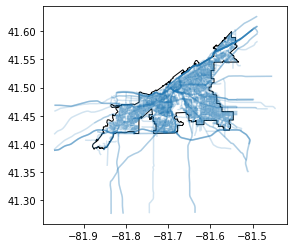

In [159]:
ax = clevelandCity.plot(facecolor='None')
allRoadsCleveland.plot(ax=ax,alpha=0.2)

#### Within a distance

A typical question would be, find all starbucks that are with in 5 miles from my home. There are two ways to approach this problem. 

##### Using buffer

Let us find out how many starbucks are there with in 2 miles from ROBINSON MEMORIAL HOSPITAL with OBJECTID 235

In [160]:
hospitals = gpd.read_file('../../largedatasets/Ohio_hospitals/Ohio_hospitals.shp')
robinson = hospitals[hospitals.OBJECTID==235]

Now lets load all the starbucks

In [161]:
starbucks = gpd.read_file(r'../../largedatasets/starbucks/starbucks.shp')

In [162]:
starbucks

,pk_uid,geometry
0,1,POINT (-73.02315 40.82713)
1,2,POINT (-72.99688 40.82229)
2,3,POINT (-73.03259 40.77785)
3,4,POINT (-73.05505 40.86302)
4,5,POINT (-73.09551 40.78991)
...,...,...
16458,16459,POINT (-147.86755 64.81745)
16459,16460,POINT (-147.35394 64.75755)
16460,16461,POINT (-134.56186 58.35966)
16461,16462,POINT (-134.59482 58.37096)


Now we can create a buffer of 2 miles around Robinson

In [163]:
robinson.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Ok so we need to re-project first. We are going to use EPSG 3857 as our starbucks data is for entire USA

In [164]:
robinsonReproj = robinson.to_crs('EPSG:3857')
robinsonReproj

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
0,235,14244266,ROBINSON MEMORIAL HOSPITAL,6847 N CHESTNUT,RAVENNA,OH,(330) 297-2300,GENERAL ACUTE CARE,OPEN,302,...,http://www.uhhospitals.org/portage,1255,UNIVERSITY HOSPITALS PORTAGE MEDICAL CENTER,39,NON-PROFIT,-999,302,LEVEL III,Y,POINT (-9044599.233 5038344.927)


Now apply a buffer of 2 miles (2 * 1609.34 meters)

In [165]:
robinsonBuffer = robinsonReproj.buffer(2 * 1609.34 )

Now we need to check how many starbucks are with in this buffer. But before that make sure the crs does match

In [166]:
starbucks.crs

seems like starbucks geodataframe doesn't have any crs information. But looking at the geometry we can almost be sure that the dataset is in Geographical coordinates. So we can assign that crs to starbucks and then re-project it.

In [167]:
starbucks.crs = 'EPSG:4326'
starbucks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [168]:
starbucksProjected = starbucks.to_crs ('EPSG:3857')
starbucksProjected

,pk_uid,geometry
0,1,POINT (-8128899.651 4986877.455)
1,2,POINT (-8125975.622 4986164.269)
2,3,POINT (-8129951.175 4979629.310)
3,4,POINT (-8132451.300 4992157.945)
4,5,POINT (-8136954.619 4981403.091)
...,...,...
16458,16459,POINT (-16460540.482 9560450.753)
16459,16460,POINT (-16403365.122 9544798.262)
16460,16461,POINT (-14979357.624 8043253.852)
16461,16462,POINT (-14983026.714 8045651.724)


Now we can use our within method to identify the starbucks that are with in 2 miles of the hospital

In [169]:
starbucksProjected[starbucksProjected.within(robinsonBuffer.geometry.values[0])]

,pk_uid,geometry


seems like there is no starbucks with in 2 miles of the hospital. Lets try 5 miles

In [170]:
robinsonNewBuffer = robinsonReproj.buffer(5 * 1609.34 )

In [171]:
starbucksProjected[starbucksProjected.within(robinsonNewBuffer.geometry.values[0])]

,pk_uid,geometry


Nothing again!!. Lets try 10 miles

In [172]:
robinsonNewBuffer2 = robinsonReproj.buffer(10 * 1609.34 )

In [173]:
starbucksProjected[starbucksProjected.within(robinsonNewBuffer2.geometry.values[0])]

,pk_uid,geometry
4537,4538,POINT (-9055032.730 5034013.481)
4539,4540,POINT (-9056261.475 5047417.575)
4540,4541,POINT (-9055237.447 5035115.760)


Atlast!!!!!!! we can see that there are three starbucks with in 10 miles of the hospital. Now let 's see the second approach. 

##### Using distance

As the name suggests the distance method gives the distance between geometries. Make sure the two geometries are having the same projection and the dataset is projected in meters/feet. 

In [174]:
starbucksDistMeter = starbucksProjected.distance(robinsonReproj.geometry.values[0])
starbucksDistMiles = starbucksDistMeter*0.000621371
starbucksDistMiles

0         569.887195
1         571.726209
2         569.505621
3         567.508408
4         565.092812
            ...     
16458    5397.193800
16459    5361.807337
16460    4133.440729
16461    4136.147794
16462    3791.261429
Length: 16463, dtype: float64

In [175]:
starbucksProjected[starbucksDistMiles<=2]

,pk_uid,geometry


In [176]:
starbucksProjected[starbucksDistMiles<=5]

,pk_uid,geometry


In [177]:
starbucksProjected[starbucksDistMiles<=10]

,pk_uid,geometry
4537,4538,POINT (-9055032.730 5034013.481)
4539,4540,POINT (-9056261.475 5047417.575)
4540,4541,POINT (-9055237.447 5035115.760)


That's it for this lecture. In the next lecture we will look into spatial joins, which is one of the key aspects of spatial analysis.